In [49]:
## import
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

In [63]:
## read and init data
# this data vocabs_to_vec_wcluster_3327-20.csv contains mapping between terms with 
# its word2vec vector representation (index 2-end). The data also contains cluster label in 2nd collumn
# The data clustered with KMeans algorithm.
filename = "data/vocabs_to_vec_wcluster_3327-20.csv"
datas = pd.read_csv(filename, header=None)


obj_labels = list(datas.loc[:,0])
coors = datas.loc[:, datas.columns != 0]
cluster_labels = list(datas.loc[:,1])
n = 10 #number of components or axes


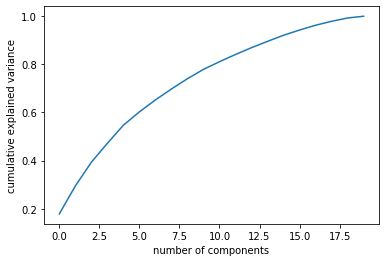

In [44]:
## identify cumulative explained variance, 
## source: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
## this is important to find number of component base on variance of data

pca = PCA().fit(coors)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
## init PCA model
pca_model = PCA(n_components=n).fit_transform(coors)

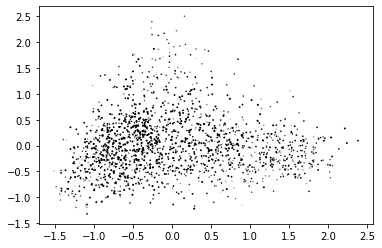

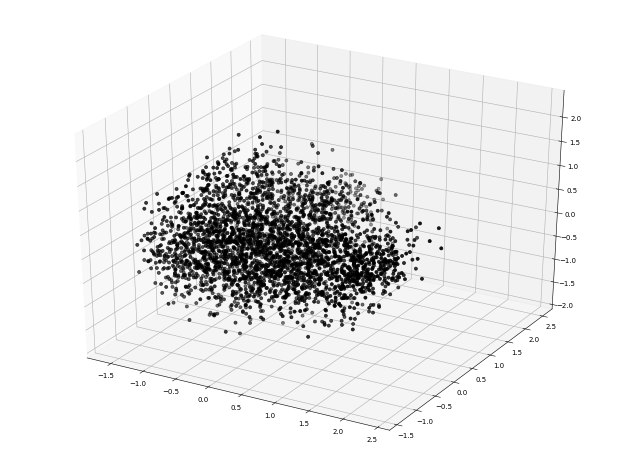

In [71]:
## plot original datas in 2D
pl.scatter(pca_model[:,0],pca_model[:,1],pca_model[:,2],c='black')
pl.show()

## plot original datas in 3D
figure(num=None, figsize=(16, 12), dpi=50, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.scatter(pca_model[:,0],pca_model[:,1],pca_model[:,2], c='black');

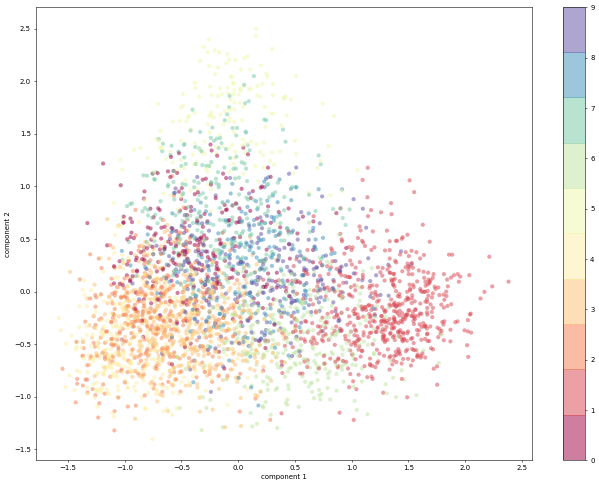

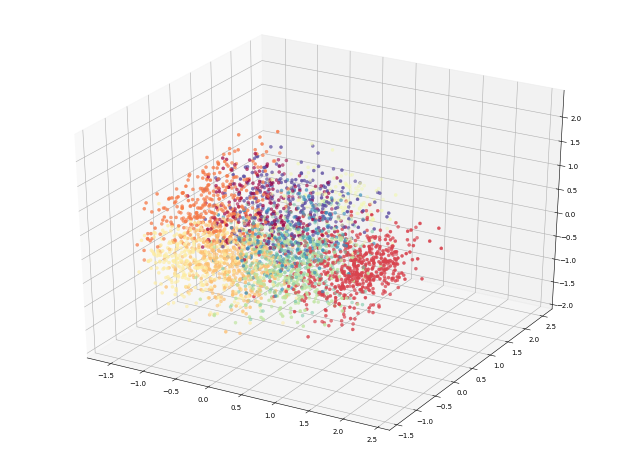

In [ ]:
## datas with labels
## 2D
figure(num=None, figsize=(16, 12), dpi=50, facecolor='w', edgecolor='k')
plt.scatter(pca_model[:, 0], pca_model[:, 1],
            c=cluster_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## plot object label
# for i, label in enumerate(obj_labels):
#     plt.text(pca_model[i, 0], pca_model[i, 1], label)

    
## 3D small version
figure(num=None, figsize=(16, 12), dpi=50, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.scatter(pca_model[:,0],pca_model[:,1],pca_model[:,2],
           c=cluster_labels, cmap='Spectral', linewidth=0.5);

## 3D large version
figure(num=None, figsize=(32, 24), dpi=200, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.scatter(pca_model[:,0],pca_model[:,1],pca_model[:,2],
           c=cluster_labels, cmap='Spectral', linewidth=0.5);